In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [9]:
cust_data=pd.read_csv("ISLAB-main\Mall_Customers.csv")
cust_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
x=cust_data.drop(columns=['CustomerID','Gender','Age'],axis=1).values

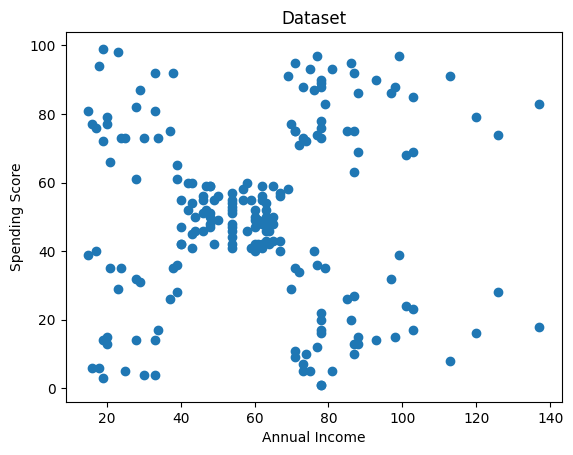

In [15]:
plt.scatter(x[:,0],x[:,1])
plt.title("Dataset")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.savefig('lol.jpg')
plt.show()

In [5]:
wcss = [] #SUM OF SQUARED ERROR
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=2,n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

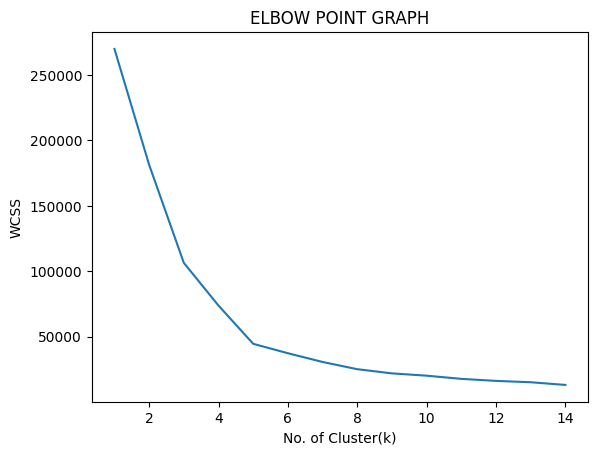

In [6]:
plt.plot(range(1,15),wcss)
plt.title("ELBOW POINT GRAPH")
plt.xlabel("No. of Cluster(k)")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=5,n_init=10)
kmeans.fit(x)
y=kmeans.predict(x)

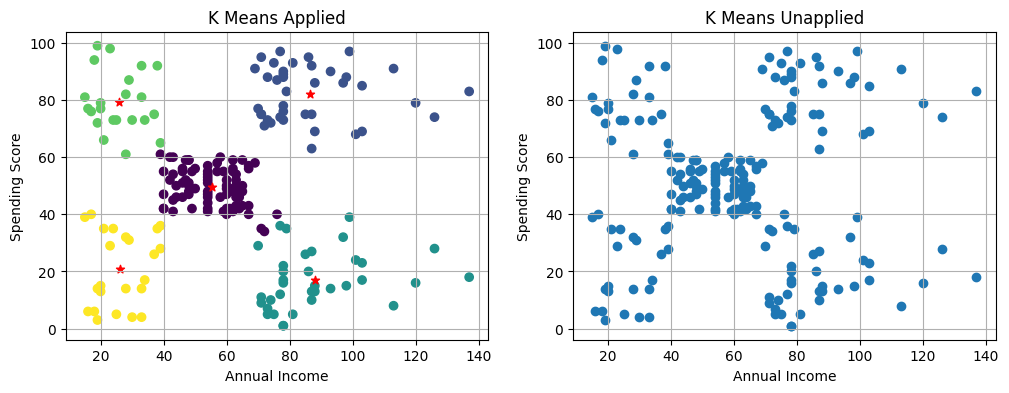

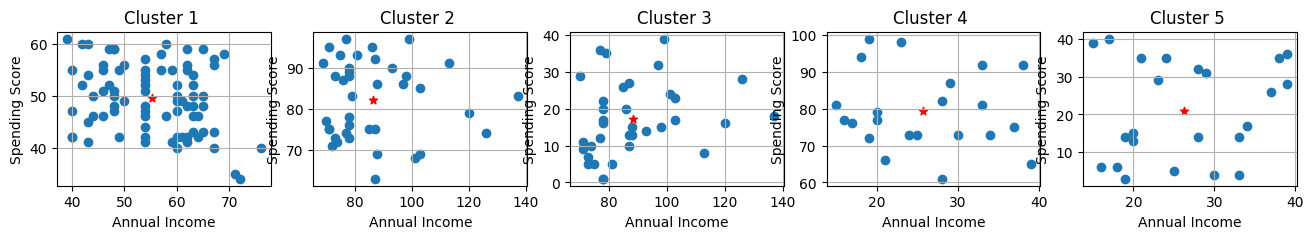

In [25]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x[:,0],x[:,1],c=y)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.title("K Means Applied")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")     

plt.subplot(1,2,2)
plt.grid(True)
plt.scatter(x[:,0],x[:,1])
plt.title("K Means Unapplied")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.show()

# color=['#3c034d','#395389','#2f8289','#63cd67','#ffdf43']
plt.figure(figsize=(16, 2))
for i, center in enumerate(kmeans.cluster_centers_):
    center = center[:2]
    plt.subplot(1,5,i+1)
    plt.scatter(x[kmeans.labels_ == i, 0], x[kmeans.labels_ == i, 1])
    plt.scatter(center[0], center[1], marker='*', c='red')
    plt.title(f'Cluster {i+1} ')
    plt.xlabel("Annual Income")
    plt.ylabel("Spending Score")
    plt.grid(True)
plt.show()